In [10]:
import torch 
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
print(t_c.shape)

torch.Size([11])


In [11]:
def model (t_u, w,b):
    return w*t_u + b

In [12]:
def loss_fn (t_p,t_c):
    return torch.mean((t_p - t_c)**2) # ** power of 2

In [13]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u,w,b)
loss_fn(t_p,t_c)

tensor(1763.8848)

Changing the value of weight w

In [14]:
delta = 0.1
loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)
#Applying a change to w that is proportional to the rate ofchange of the loss is a good idea
learning_rate = 1e-2
#the  change  is  positive,  we  need  to decrease w
w=w-learning_rate * loss_rate_of_change_w
w

tensor(-44.1730)

Changing the value of weight w

In [15]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b=b-learning_rate * loss_rate_of_change_b
b

tensor(46.)

In [16]:
1-learning_rate * loss_rate_of_change_w

tensor(-44.1730)

In [17]:
def dloss_fn (t_p,t_c):
    return (2*(t_p - t_c)/t_p.size(0))
def dmodel_dw(t_u, w, b):
    return t_u
def dmodel_db(t_u, w, b):
    return 1.0

DEFINING THE GRADIENT FUNCTION

In [18]:
#Putting all of this together, the function returning the gradient of the loss with respect to w and b is
def grad_fn(t_u,t_c,t_p,w,b):
    w_ = dloss_fn(t_p,t_c)*dmodel_dw(t_u,w,b)
    b_ = dloss_fn(t_p,t_c)*dmodel_db(t_u,w,b)
    return torch.stack([w_.sum(),b_.sum()])
    

In [81]:

def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range (1, n_epochs+1):
        w,b =params
        t_p = model(t_u,w,b) #forward pass
        loss = loss_fn(t_p,t_c)
        grad = grad_fn(t_u,t_c,t_p,w,b) #Backward pass
        params = params - learning_rate*grad;
        
        if epoch <15 or epoch%500==0:
            print('*************Epoch: %d,\nLoss: %f' % (epoch, float(loss)))   
            print('params: ', params)
            print('grad: ',grad,'\n')
    return params

In [82]:
#overfitting
params = training_loop(
    n_epochs = 1002,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_u,
    t_c = t_c)

*************Epoch: 1,
Loss: 1763.884766
params:  tensor([-44.1730,  -0.8260])
grad:  tensor([4517.2964,   82.6000]) 

*************Epoch: 2,
Loss: 5802484.500000
params:  tensor([2568.4011,   45.1637])
grad:  tensor([-261257.4062,   -4598.9702]) 

*************Epoch: 3,
Loss: 19408029696.000000
params:  tensor([-148527.7344,   -2616.3931])
grad:  tensor([15109614.0000,   266155.6875]) 

*************Epoch: 4,
Loss: 64915905708032.000000
params:  tensor([8589999.0000,  151310.8906])
grad:  tensor([-8.7385e+08, -1.5393e+07]) 

*************Epoch: 5,
Loss: 217130525461053440.000000
params:  tensor([-4.9680e+08, -8.7510e+06])
grad:  tensor([5.0539e+10, 8.9023e+08]) 

*************Epoch: 6,
Loss: 726257583152928129024.000000
params:  tensor([2.8732e+10, 5.0610e+08])
grad:  tensor([-2.9229e+12, -5.1486e+10]) 

*************Epoch: 7,
Loss: 2429183416467662896627712.000000
params:  tensor([-1.6617e+12, -2.9270e+10])
grad:  tensor([1.6904e+14, 2.9776e+12]) 

*************Epoch: 8,
Loss: 812512

In [83]:
#hyperparameter  tuning
learning_rate = 1e-4
params = training_loop(
    n_epochs = 5000,
    learning_rate=learning_rate,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_u,
    t_c = t_c)

*************Epoch: 1,
Loss: 1763.884766
params:  tensor([ 0.5483, -0.0083])
grad:  tensor([4517.2964,   82.6000]) 

*************Epoch: 2,
Loss: 323.090515
params:  tensor([ 0.3623, -0.0118])
grad:  tensor([1859.5493,   35.7843]) 

*************Epoch: 3,
Loss: 78.929634
params:  tensor([ 0.2858, -0.0135])
grad:  tensor([765.4666,  16.5122]) 

*************Epoch: 4,
Loss: 37.552845
params:  tensor([ 0.2543, -0.0143])
grad:  tensor([315.0790,   8.5787]) 

*************Epoch: 5,
Loss: 30.540283
params:  tensor([ 0.2413, -0.0149])
grad:  tensor([129.6733,   5.3127]) 

*************Epoch: 6,
Loss: 29.351154
params:  tensor([ 0.2360, -0.0153])
grad:  tensor([53.3495,  3.9682]) 

*************Epoch: 7,
Loss: 29.148884
params:  tensor([ 0.2338, -0.0156])
grad:  tensor([21.9304,  3.4148]) 

*************Epoch: 8,
Loss: 29.113848
params:  tensor([ 0.2329, -0.0159])
grad:  tensor([8.9964, 3.1869]) 

*************Epoch: 9,
Loss: 29.107145
params:  tensor([ 0.2325, -0.0162])
grad:  tensor([3.6721,

In [84]:
#hyperparameter  tuning
learning_rate = 1e-2
#normlization
t_un=0.1*t_u 
params = training_loop(
    n_epochs = 5000,
    learning_rate=learning_rate,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c)

*************Epoch: 1,
Loss: 80.364342
params:  tensor([1.7761, 0.1064])
grad:  tensor([-77.6140, -10.6400]) 

*************Epoch: 2,
Loss: 37.574913
params:  tensor([2.0848, 0.1303])
grad:  tensor([-30.8623,  -2.3864]) 

*************Epoch: 3,
Loss: 30.871077
params:  tensor([2.2094, 0.1217])
grad:  tensor([-12.4631,   0.8587]) 

*************Epoch: 4,
Loss: 29.756193
params:  tensor([2.2616, 0.1004])
grad:  tensor([-5.2218,  2.1327]) 

*************Epoch: 5,
Loss: 29.507153
params:  tensor([2.2853, 0.0740])
grad:  tensor([-2.3715,  2.6310]) 

*************Epoch: 6,
Loss: 29.392456
params:  tensor([2.2978, 0.0458])
grad:  tensor([-1.2492,  2.8241]) 

*************Epoch: 7,
Loss: 29.298828
params:  tensor([2.3059, 0.0168])
grad:  tensor([-0.8071,  2.8970]) 

*************Epoch: 8,
Loss: 29.208717
params:  tensor([ 2.3122, -0.0124])
grad:  tensor([-0.6325,  2.9227]) 

*************Epoch: 9,
Loss: 29.119415
params:  tensor([ 2.3178, -0.0417])
grad:  tensor([-0.5633,  2.9298]) 

*********

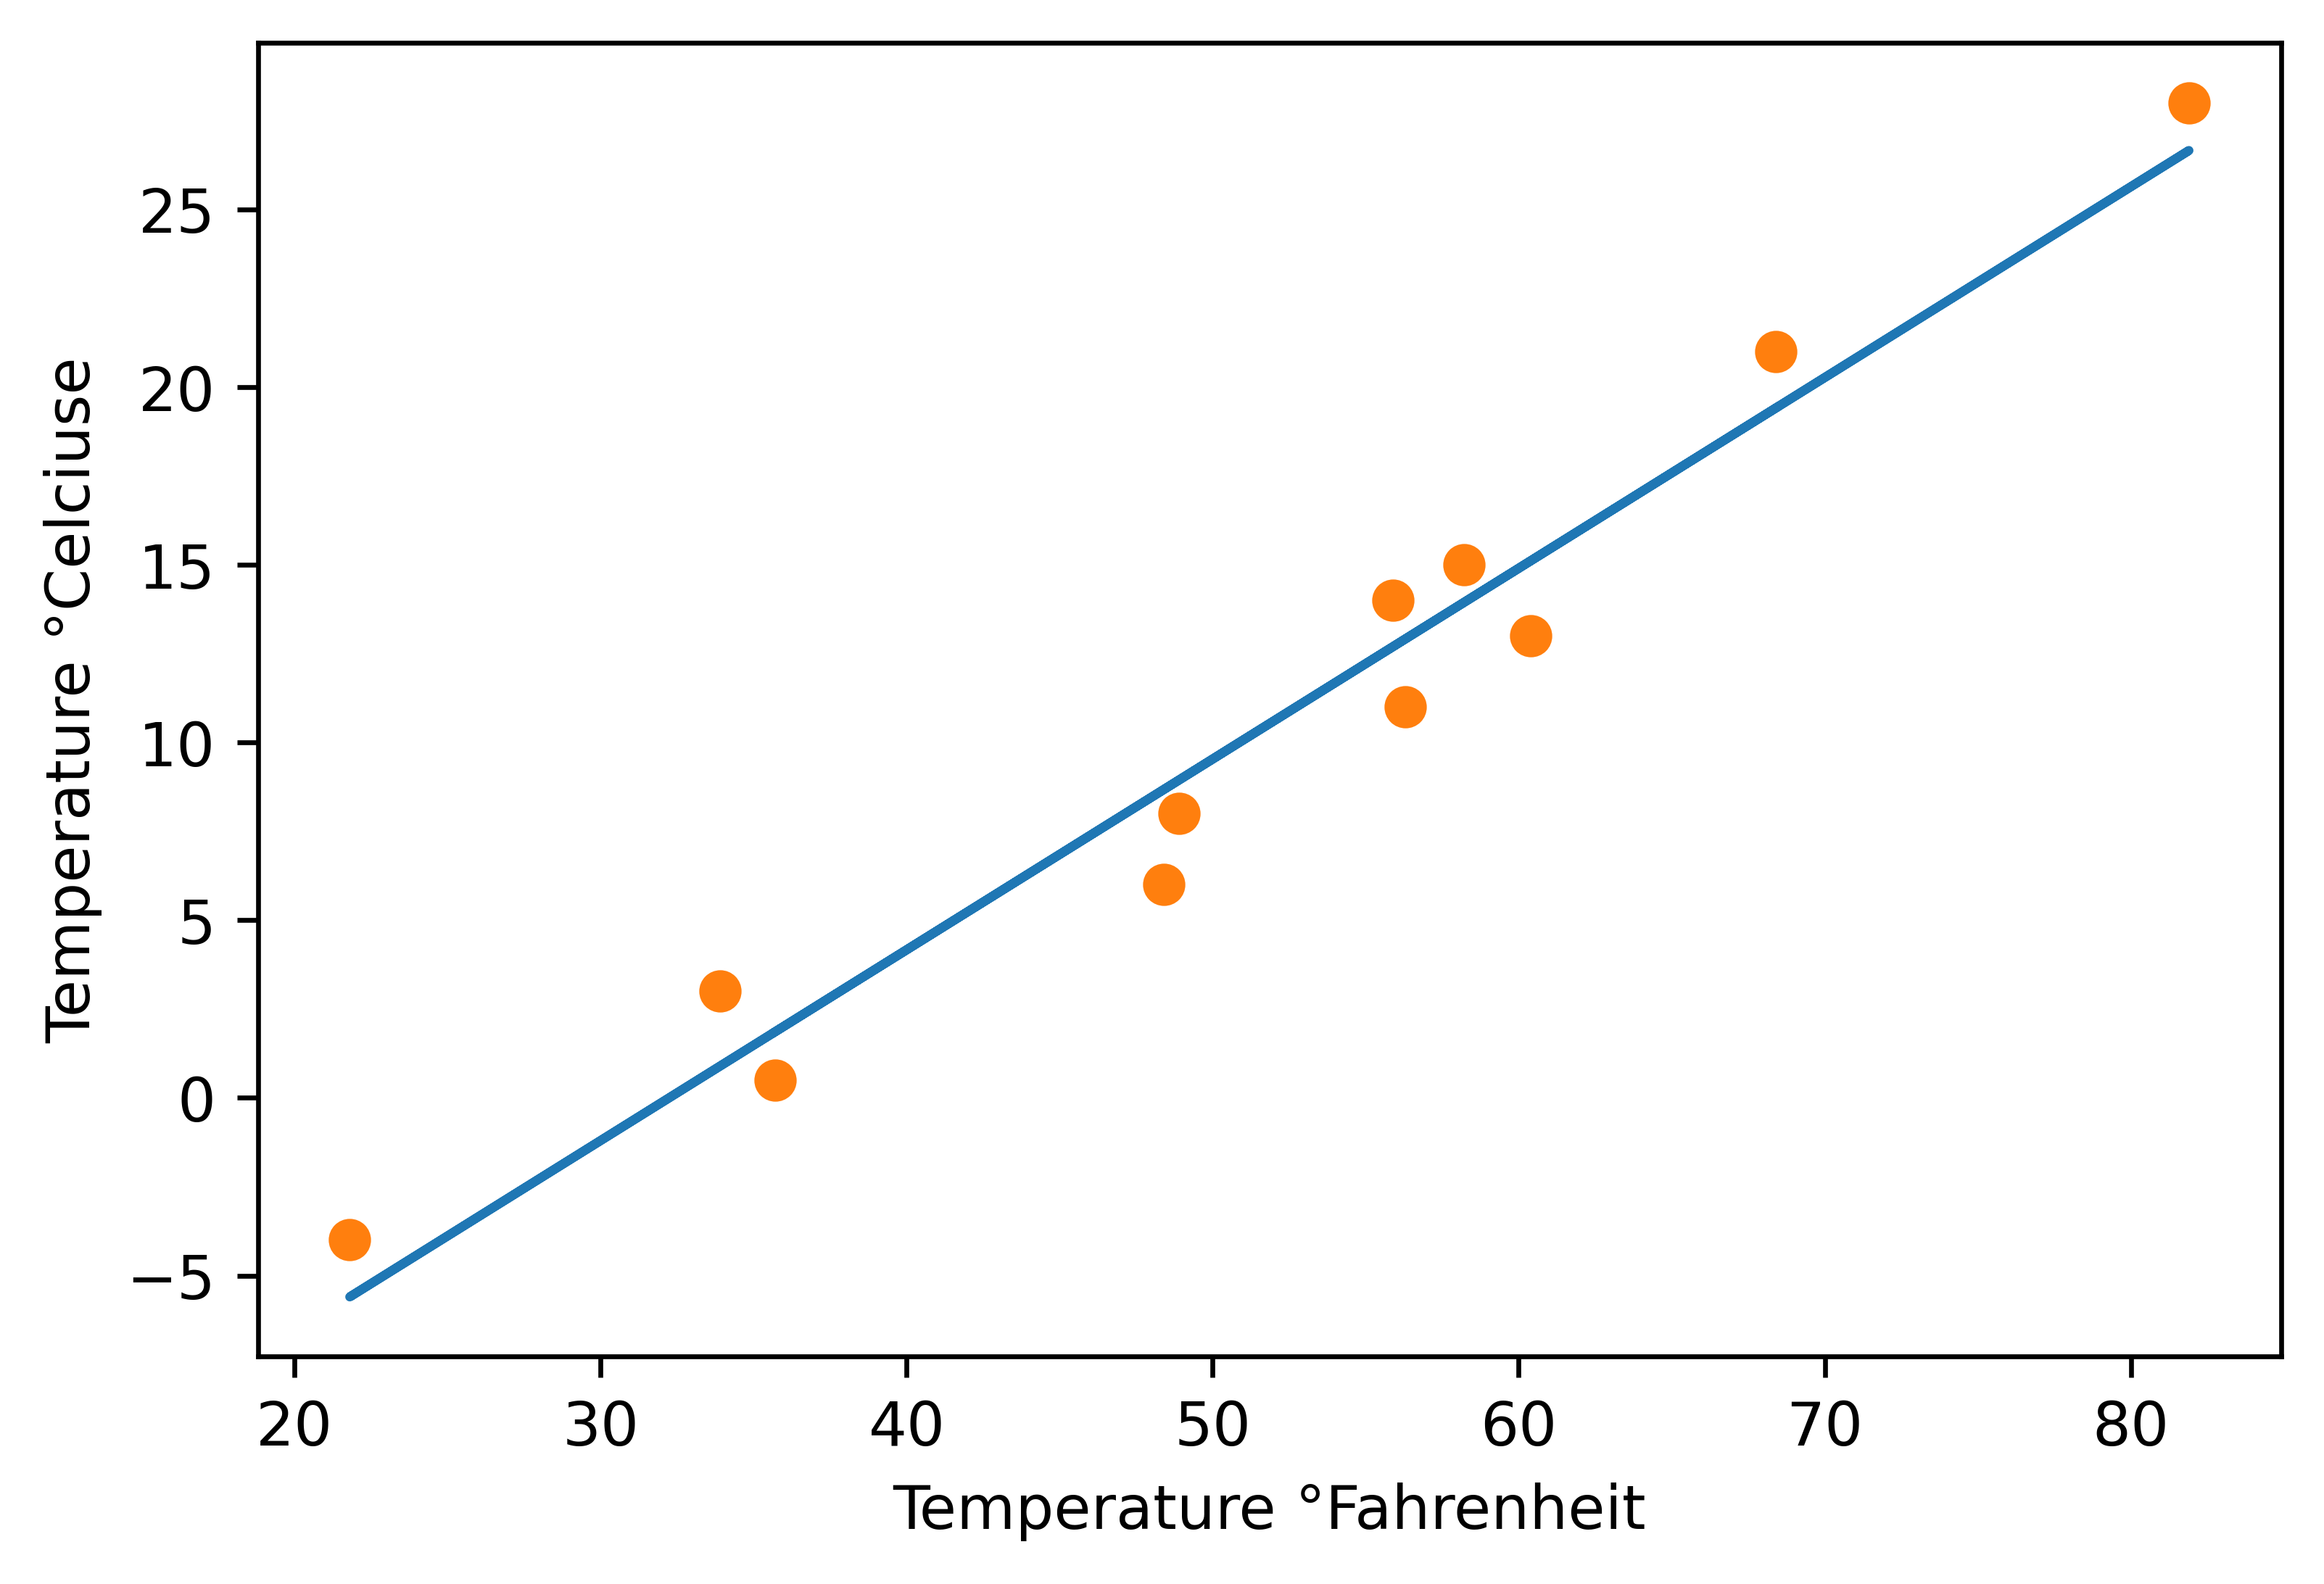

In [85]:
from matplotlib import pyplot as plt
t_un=0.1*t_u
t_p = model(t_un,*params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature °Fahrenheit")
plt.ylabel("Temperature °Celciuse")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.detach().numpy(), 'o')